In [5]:
import numpy as np
import random
from ga import GeneticAlgorithm
import matplotlib.pyplot as plt



In [6]:
bound=list(range(1,501))

np.random.seed(5)
x=np.random.choice(bound,17,replace=False)
y=np.random.choice(bound,17,replace=False)


np.random.seed(10)
x_s=np.random.choice(bound,88,replace=False)
y_s=np.random.choice(bound,88,replace=False)
t=np.random.choice(list(range(1,4)),88)
data=[]
for i in range(88):
  d={}
  d['x_s']=x_s[i]
  d['y_s']=y_s[i]
  d['type']=t[i]
  data.append(d)
cost_list=[]
for i in range(88):
  if(data[i]["type"]==1):
    cost_list.append(300)
  if(data[i]["type"]==2):
    cost_list.append(170)
  if(data[i]["type"]==3):
    cost_list.append(65)
dis_list=[]
for i in range(88):
  if(data[i]["type"]==1):
    dis_list.append(100)
  if(data[i]["type"]==2):
    dis_list.append(70)
  if(data[i]["type"]==3):
    dis_list.append(30)

In [7]:
targets=[]
coordinate=[]
for i in range(len(x)):
  coordinate.append(x[i])
  coordinate.append(y[i])
  targets.append(coordinate)
  coordinate=[]

s_coordinate=[]
sensor_coordinate=[]
for i in range(len(data)):
  s_coordinate.append(x_s[i])
  s_coordinate.append(y_s[i])
  sensor_coordinate.append(s_coordinate)
  s_coordinate=[]

In [8]:
targets

[[242, 447],
 [449, 477],
 [76, 313],
 [213, 442],
 [482, 217],
 [281, 45],
 [475, 160],
 [270, 232],
 [41, 28],
 [223, 270],
 [57, 10],
 [345, 441],
 [473, 4],
 [249, 287],
 [222, 390],
 [301, 323],
 [157, 377]]

In [9]:
data

[{'x_s': 152, 'y_s': 41, 'type': 3},
 {'x_s': 425, 'y_s': 481, 'type': 3},
 {'x_s': 155, 'y_s': 464, 'type': 3},
 {'x_s': 191, 'y_s': 150, 'type': 2},
 {'x_s': 132, 'y_s': 75, 'type': 3},
 {'x_s': 311, 'y_s': 448, 'type': 1},
 {'x_s': 267, 'y_s': 151, 'type': 1},
 {'x_s': 496, 'y_s': 90, 'type': 1},
 {'x_s': 158, 'y_s': 268, 'type': 3},
 {'x_s': 283, 'y_s': 18, 'type': 1},
 {'x_s': 453, 'y_s': 14, 'type': 1},
 {'x_s': 153, 'y_s': 207, 'type': 1},
 {'x_s': 165, 'y_s': 178, 'type': 2},
 {'x_s': 220, 'y_s': 469, 'type': 3},
 {'x_s': 352, 'y_s': 12, 'type': 3},
 {'x_s': 434, 'y_s': 309, 'type': 1},
 {'x_s': 44, 'y_s': 337, 'type': 2},
 {'x_s': 48, 'y_s': 219, 'type': 2},
 {'x_s': 468, 'y_s': 235, 'type': 1},
 {'x_s': 209, 'y_s': 359, 'type': 2},
 {'x_s': 399, 'y_s': 197, 'type': 1},
 {'x_s': 438, 'y_s': 17, 'type': 3},
 {'x_s': 475, 'y_s': 205, 'type': 2},
 {'x_s': 237, 'y_s': 336, 'type': 3},
 {'x_s': 369, 'y_s': 426, 'type': 1},
 {'x_s': 130, 'y_s': 395, 'type': 1},
 {'x_s': 231, 'y_s': 

In [10]:
k=1
def constraint(a,data):
  s_site_cor=[]
  d_lis=[]
  for i in range(len(a)):
    if(a[i]==1):
      s_site_cor.append(sensor_coordinate[i])
      d_lis.append(dis_list[i])
  s=np.array(s_site_cor)
  d=np.array(d_lis)
  for j in range(len(targets)):
    distance=np.linalg.norm((targets[j]-s),axis=1)-d
    if((distance<=0).sum()<k):
      return 0
  return 1



In [45]:
ga=GeneticAlgorithm(data,population_size=500,generations=100,crossover_probability=0.8,mutation_probability=0.2,elitism=True,maximise_fitness=False)

def create_individual(data):
  return [random.randint(0, 1) for _ in range(len(data))]
ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  index = random.randrange(1, len(parent_1))
  child_1 = parent_1[:index] + parent_2[index:]
  child_2 = parent_2[:index] + parent_1[index:]
  return child_1, child_2
ga.crossover_function=crossover


def mutation(individual):
  mutate_index = random.randrange(len(individual))
  if (individual[mutate_index]==0):
    individual[mutate_index]=1
  else:
    individual[mutate_index]=0
ga.mutate_function = mutation

def fitness(individual,data):
  result=0
  if(constraint(individual,data)==0):
    result=999999
  else:
    for i in range(len(individual)):
      result=result+individual[i]*cost_list[i]
  return result
ga.fitness_function = fitness
ga.rank_population()
cost=ga.run()

print(ga.best_individual())
print(len(cost))

(1905, [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
99


In [46]:
print("The final number of sensors is {}".format((ga.best_individual()[1]).count(1)))

The final number of sensors is 8


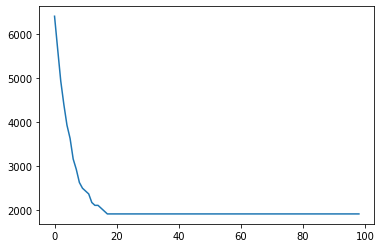

In [47]:
c=[]
for i in range(len(cost)):
     c.append(cost[i].fitness)
plt.plot(c)

In [48]:
solution=ga.best_individual()[1]
sfc=[]
dist=[]
for i in range(len(solution)):
  if(solution[i]==1):
    sfc.append(sensor_coordinate[i])
    dist.append(dis_list[i])
s_final=np.array(sfc)
d_final=np.array(dist)

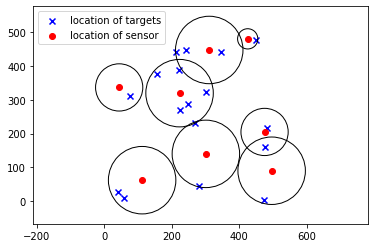

In [49]:
import matplotlib.patches as mpathes
targets=np.array(targets)
fig,ax = plt.subplots()
plt.scatter(targets[:,0],targets[:,1],marker='x',c='blue',label="location of targets")
plt.scatter(s_final[:,0],s_final[:,1],marker='o',c='red',label="location of sensor")
for i in range(len(s_final)):
  circle = mpathes.Circle(s_final[i],d_final[i],color="none",ec="black")
  ax.add_patch(circle)
plt.axis([0,500,0,500])
plt.axis('equal')
plt.legend()
plt.show()